In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #tells the notebook to load figures in offline mode


import plotly
print(plotly.__version__)


import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.metric import Schwarzschild
from einsteinpy.utils import schwarzschild_radius

import einsteinpy
print(einsteinpy.__version__)




3.8.1
0.2.dev0


<IPython.core.display.Javascript object>


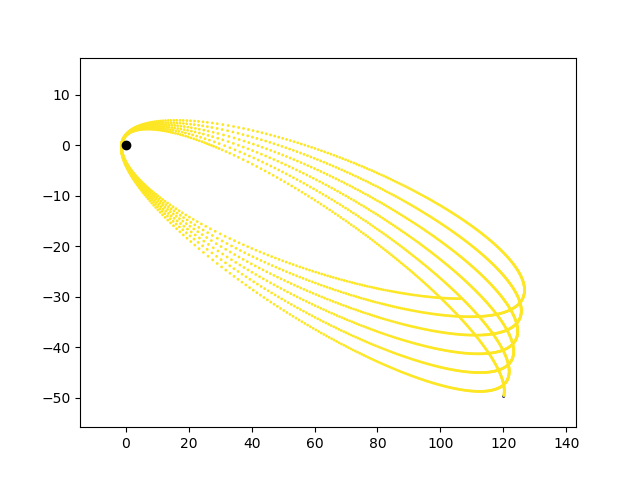

In [3]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential

M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

%matplotlib notebook
obj = ScatterGeodesicPlotter(M)
obj.animate(sph_obj, 0.002, 5e-8, interval=5)
obj.show() 

In [15]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1

In [ ]:
data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),1000)]
data[5]['visible'] = True


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout=dict(sliders=sliders,

            title='[EINSTEINPY] Plotly Animation', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

# layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='[EINSTEINPY] Plotly Animation')

<IPython.core.display.Javascript object>


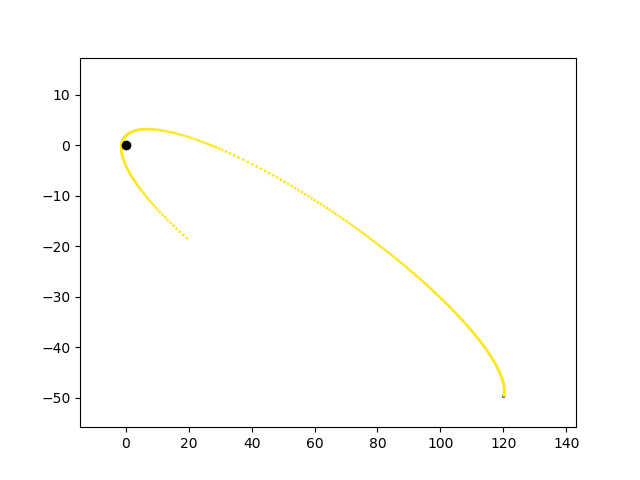

In [122]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential

M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

%matplotlib notebook
obj = ScatterGeodesicPlotter(M)
obj.animate(sph_obj, 0.002, 5e-8, interval=5)
obj.show() 

In [114]:
import numpy as np

# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = np.arange(0,10,0.01),
#         y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),100)]
data[5]['visible'] = True

# iplot(data, filename='Single Sine Wave')

In [6]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1


In [21]:

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = pos_x[:i],
        y = pos_y[:i]) for i in range(0,len(pos_x),50)]
data[5]['visible'] = True
# data = [dict(
#         visible = False,
#         line=dict(color='#00CED1', width=6),
#         name = '𝜈 = '+str(step),
#         x = np.arange(0,10,0.01),
#         y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
# data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 100,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout=dict(sliders=sliders,

            title='[EINSTEINPY] Plotly Animation', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

# layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

plot(fig, filename='[EINSTEINPY] Plotly Animation')

'[EINSTEINPY] Plotly Animation.html'

In [14]:
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True


steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='Sine Wave Slider')

In [8]:
len(pos_x)

6463

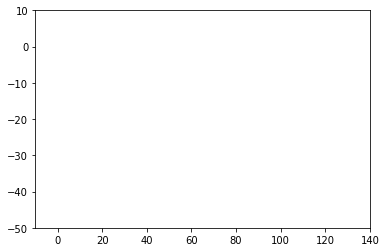

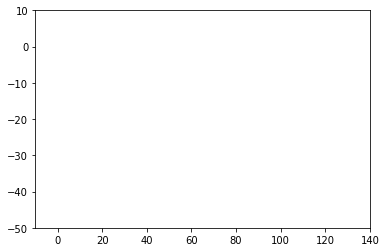

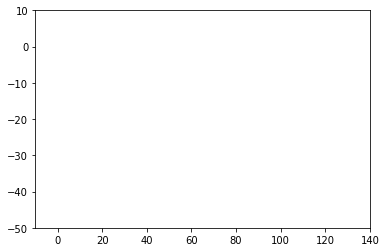

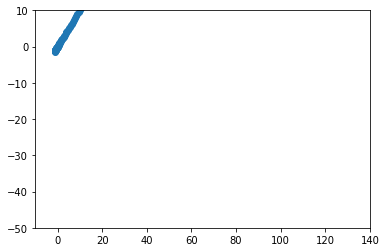

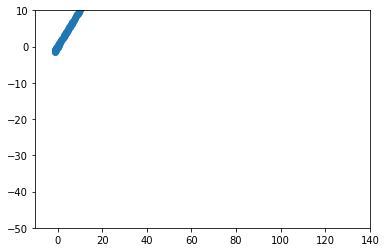

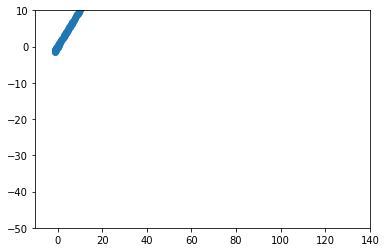

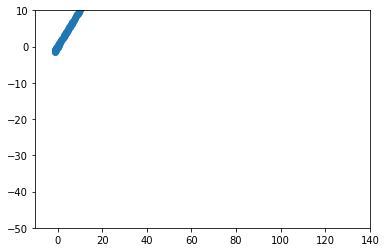

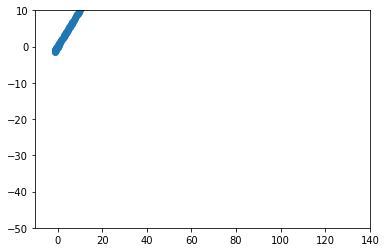

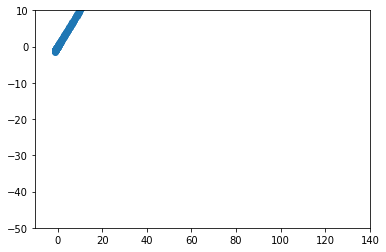

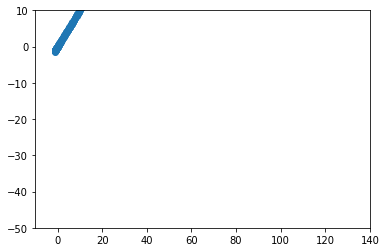

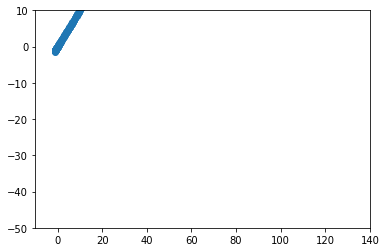

In [62]:
import matplotlib.pyplot as plt
for i in range(len(pos_x)):
    plt.scatter(chunks_x[:i],chunks_x[:i])
    plt.ylim(-50,10)
    plt.xlim(-10,140)
    plt.show()

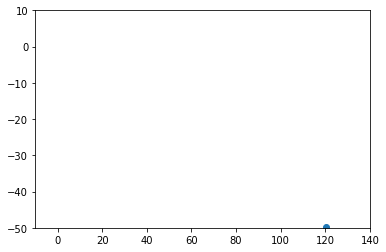

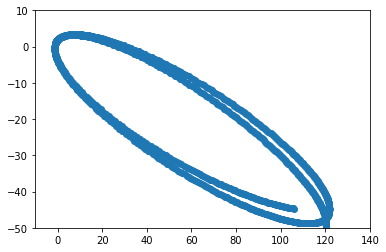

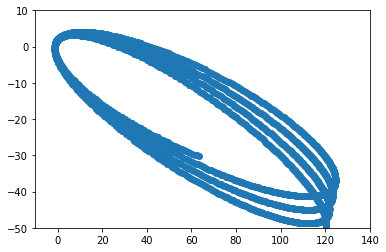

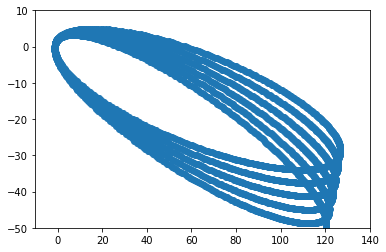

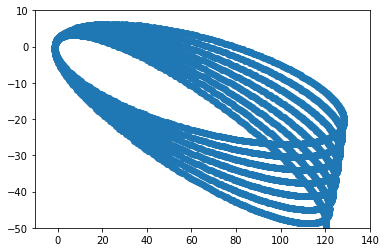

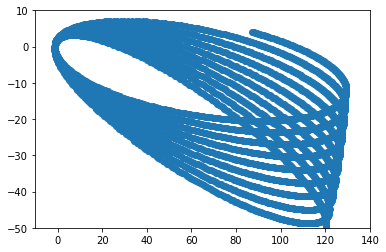

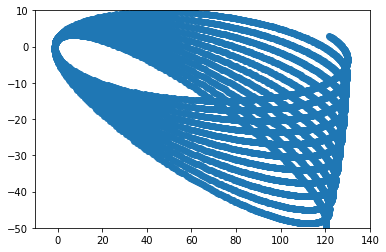

In [99]:
for i in range(1,len(pos_x),1000):
#     print(pos_x[:i])
    plt.scatter(pos_x[:i],pos_y[:i])
    plt.ylim(-50,10)
    plt.xlim(-10,140)
    plt.show()

In [98]:
len(pos_x)/1000

6.463

In [61]:
chunks_x = [pos_x[x:x+100] for x in range(0, len(pos_x), int(len(pos_x)/10))]
chunks_y = [pos_y[x:x+100] for x in range(0, len(pos_y), int(len(pos_x)/10))]


In [82]:
for i in range(len(chunks_x)):
    print(len(chunks_x[0:i][0]))
#     print("==================================================================================================================================================================================================================================================================================================")

IndexError: list index out of range

In [86]:
type(chunks_x[0:i][1])

numpy.ndarray

In [84]:
i=2

In [40]:
[len(chunks_x[i]) for i in range(len(chunks_x))]

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 63]

In [36]:
data = [dict(
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]

In [37]:
data

[{'x': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
         0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
         0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
         0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
         0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
         1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
         1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
         1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
         1.43, 1.44,

In [1]:
import numpy as np
import astropy.units as u
from einsteinpy.plotting import ScatterGeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential
from einsteinpy.metric import Schwarzschild


In [2]:
M = 6e24 * u.kg
sph_obj = SphericalDifferential(130*u.m, np.pi/2*u.rad, -np.pi/8*u.rad,
                                0*u.m/u.s, 0*u.rad/u.s, 1900*u.rad/u.s)

In [3]:
swc = Schwarzschild.from_spherical(sph_obj, M, 0 * u.s)

vals = swc.calculate_trajectory(
    end_lambda=0.002, OdeMethodKwargs={"stepsize":  5e-8}
)[1]

time = vals[:, 0]
r = vals[:, 1]
# Currently not being used (might be useful in future)
# theta = vals[:, 2]
phi = vals[:, 3]

pos_x = r * np.cos(phi)
pos_y = r * np.sin(phi)
frames = pos_x.shape[0]
x_max, x_min = max(pos_x), min(pos_x)
y_max, y_min = max(pos_y), min(pos_y)
margin_x = (x_max - x_min) * 0.1
margin_y = (y_max - y_min) * 0.1

In [ ]:
# !pip install poliastro
import numpy as np
from poliastro.examples import *

from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter3d, Surface

init_notebook_mode(connected=True)

rr = molniya.sample()

trace = Scatter3d(
    x=rr.x.value, y=rr.y.value, z=rr.z.value,
    line=dict(
        color='#000000',
        width=5,
    ),
    mode="lines",
)

radius = molniya.attractor.R.to(u.km).value

uu, vv = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
xx = radius * np.cos(uu) * np.sin(vv)
yy = radius * np.sin(uu) * np.sin(vv)
zz = radius * np.cos(vv)

planet = Surface(
    x=xx,
    y=yy,
    z=zz,
    cauto=False,
    cmin=1,
    cmax=1,
    colorscale=[[0, '#204a87'], [1, '#204a87']],
    showscale=False
    
)


data = [trace, planet]

layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Orbit plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1.5 ),
        #aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='orbit-plot', image_height=700, validate=False)